### MSDS Week 1 - Discussion Board - Part 2:
Every week, I want you to share Python coding as a Team.  To start, go to Kaggle.com and sign up for the Titanic: Machine Learning Through Disaster competition. https://www.kaggle.com/c/titanic

Download the train.csv dataset and run some basic descriptive statistics and graphs for two or more variables of your choosing using Python.  Provide your Python code here, perhaps as a Jupyter notebook .html file on GitHub.  Embed at least one graph in your discussion by using the "Files" link in the upper right portion of Canvas.

In [12]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Checking the missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can note from above details that train data set contains in total 891 rows. Most of the columns are complete with non-null data, except Age which contains 177 null values and Cabin, which contains 687. 

Overall, I am going forward with my analysis with an assumption that Cabin data was not populated correctly with over 77% null value. 

In [27]:
#Dropping Cabin column
train.drop(columns = 'Cabin',inplace=True)

In [28]:
train['Age'] = train['Age'].fillna((train['Age'].mean()))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


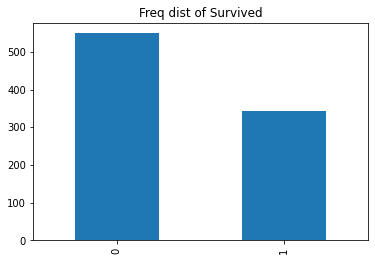

In [42]:
# Check the data set for number of people who survived vs not
#sns.countplot(x='Survived', data=train);
train['Survived'].value_counts().plot.bar(title='Freq dist of Survived');

In [37]:
train.groupby(['Survived']).size()

Survived
0    549
1    342
dtype: int64

From above chart and group by stats, we can see that 342 of 891 passengers in train data survived, which is close to 38% survival rate.

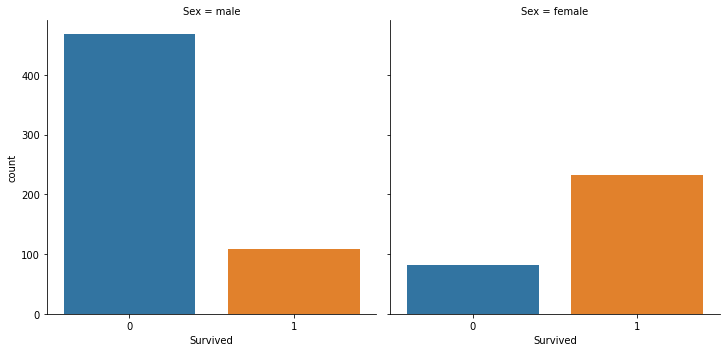

In [19]:
#Compare by Sex the total number of people who suvived vs not
sns.catplot(x='Survived', col='Sex', kind='count', data=train);

From above bar plot, we can see that Female sex had a much higher survival rate when compared to male. Hence this is an important feature which can help us predict the survival chance on new test data set.

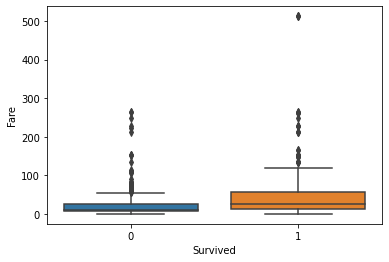

In [14]:
sns.boxplot(train.Survived, train.Fare)
plt.show()

From above box plot, distribution suggests that of all the Titanic onboarded passengers, one who had paid higher fare had better survival rate. 

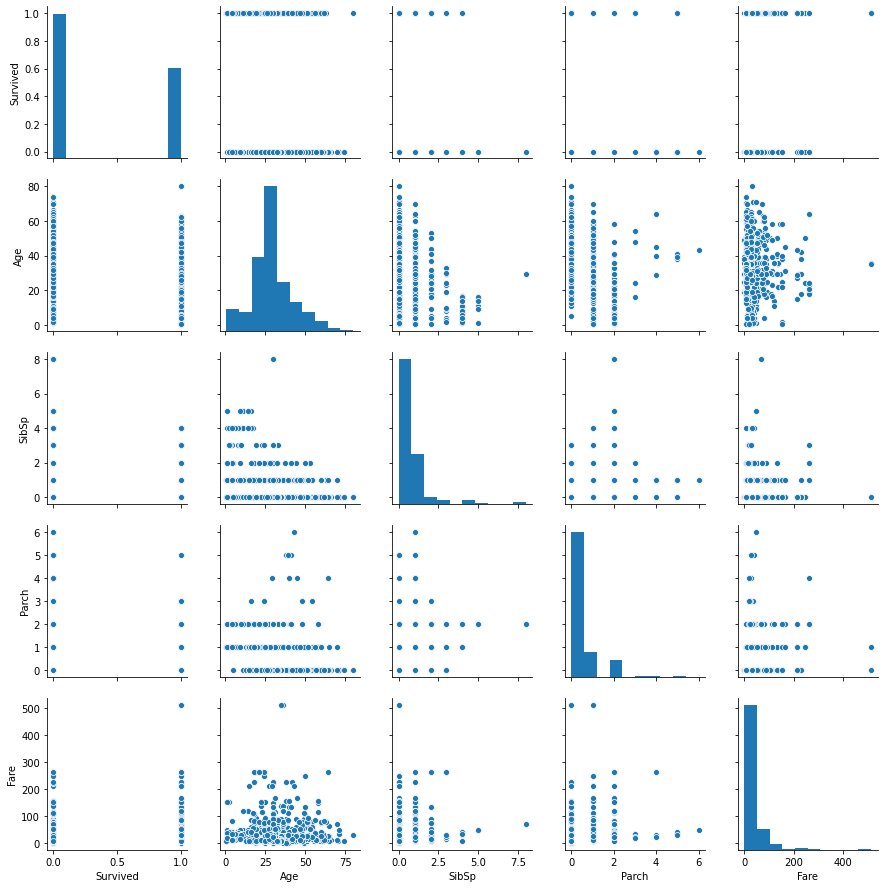

In [46]:
#Checking how few features are corellated when compared to other features
train_pairplot = train.drop(['PassengerId','Name', 'Pclass', 'Sex', 'Ticket','Embarked'], axis=1)
sns.pairplot(train_pairplot)
plt.show()